In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Génération des données avec make_classification
X, y = make_classification(
    n_samples=10000,
    n_features=20,
    n_informative=3,  # Augmenté à 3
    n_classes=3,
    n_clusters_per_class=2,
    class_sep=2,
    random_state=42
)


# Afficher les dimensions de X et y
print(X.shape, y.shape)


(10000, 20) (10000,)


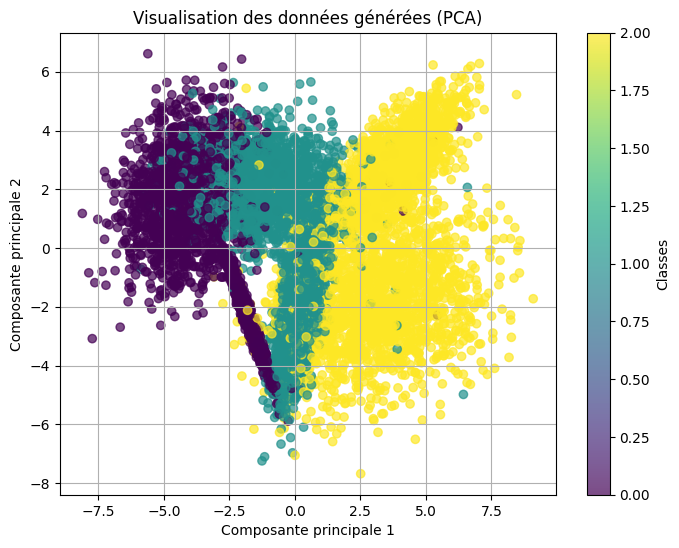

In [4]:
# Réduction de la dimension à 2 composantes
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualisation des données dans l'espace 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Classes')
plt.title("Visualisation des données générées (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Division initiale : 70% entraînement et 30% temporaire (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Division secondaire : 20% test et 10% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42)

print(f"Dimensions - Entraînement : {X_train.shape}, Test : {X_test.shape}, Validation : {X_val.shape}")


Dimensions - Entraînement : (7000, 20), Test : (2001, 20), Validation : (999, 20)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Création et entraînement du modèle
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Évaluation des performances
print("Précision sur les données de test :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Précision sur les données de test : 0.9635182408795602

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       650
           1       0.94      0.96      0.95       670
           2       0.97      0.94      0.95       681

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001

